# Projeto Renner: Como projetar a receita da empresa através da abertura de novas lojas.
  
  
### Passo a passo:

   **Passo 1** - Ler e tratar os dados de lojas atuais.

   **Passo 2** - Ler e tratar dados dos munícipios brasileiros.
   
   **Passo 3** - Observar as características atuais das lojas.
   
   **Passo 4** - Concluir padrões observados.
   
   **Passo 5** - Traçar um plano de análise.
   
   **Passo 6** -  Pegar os dados faltantes para a projeção.
   
   **Passo 7** - Fazer a projeção.
   
   **Passo 8** - Usar a projeção pra projetar a receita líquida e chegar ao valor justo da empresa.

In [1]:
!pip install mplcyberpunk

     ---------------------------------------- 0.0/162.8 kB ? eta -:--:--
     -------------------------------------- 162.8/162.8 kB 4.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.7 MB ? eta -:--:--
   -- ------------------------------------- 0.5/7.7 MB 9.6 MB/s eta 0:00:01
   ---- ----------------------------------- 0.9/7.7 MB 9.8 MB/s eta 0:00:01
   ------ --------------------------------- 1.2/7.7 MB 11.1 MB/s eta 0:00:01
   -------- ------------------------------- 1.7/7.7 MB 8.8 MB/s eta 0:00:01
   ----------- ---------------------------- 2.2/7.7 MB 8.1 MB/s eta 0:00:01
   -------------- ------------------------- 2.8/7.7 MB 8.8 MB/s eta 0:00:01
   ----------------- ---------------------- 3.3/7.7 MB 9.3 MB/s eta 0:00:01
   ------------------- -------------------- 3.8/7.7 MB 9.4 MB/s eta 0:00:01
   ---------------------- ----------------- 4.3/7.7 MB 9.5 MB/s eta 0:00:01
   -------------------------- ------------- 5.2/7.7 MB 10.0 MB/s eta 0:00:01
   -------------

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import mplcyberpunk

plt.style.use('cyberpunk')

# Coleta e tratamento de dados

----------

<br>

## Passo 1: Pegar os dados de lojas atuais.

In [ ]:
!pip install openpyxl

In [4]:
nome_sheet = 'Lista de Lojas | Stores List'

planilha_renner = pd.read_excel("lojas_renner.xlsx", sheet_name = nome_sheet, skiprows = 5, 
                                usecols = ['Business', 'Country', 'UF', 'State', 'City',
                                           'Opening date', 'Shopping Mall / Street'])

In [5]:
planilha_renner = planilha_renner.dropna()

planilha_renner = planilha_renner[(planilha_renner['Business'] == "Renner") & 
                                  (planilha_renner['Country'] == "Brazil")]

planilha_renner['Opening date'] = pd.to_datetime(planilha_renner['Opening date'])

planilha_renner

,Business,Opening date,Country,UF,State,City,Shopping Mall / Street
2,Renner,2023-11-30,Brazil,ES,Espírito Santo,Aracruz,Shopping Mall
8,Renner,2023-11-09,Brazil,SP,São Paulo,São Paulo,Shopping Mall
10,Renner,2023-10-27,Brazil,RS,Rio Grande do Sul,Montenegro,Street
11,Renner,2023-10-17,Brazil,MG,Minas Gerais,Ituiutaba,Shopping Mall
12,Renner,2023-10-11,Brazil,SC,Santa Catarina,Videira,Shopping Mall
...,...,...,...,...,...,...,...
735,Renner,1980-09-01,Brazil,RS,Rio Grande do Sul,Santa Maria,Street
736,Renner,1977-11-01,Brazil,RS,Rio Grande do Sul,Porto Alegre,Street
737,Renner,1976-04-10,Brazil,RS,Rio Grande do Sul,Canoas,Shopping Mall
738,Renner,1970-12-04,Brazil,RS,Rio Grande do Sul,Porto Alegre,Shopping Mall


## Passo 2: Pegar os dados dos municípios brasileiros.

Vamos no SIDRA, do IBGE.

https://sidra.ibge.gov.br/pesquisa/censo-demografico/demografico-2022/primeiros-resultados-populacao-e-domicilios

<br>

https://sidra.ibge.gov.br/pesquisa/pib-munic/tabelas

In [6]:
pib_municipios = pd.read_excel("pib_municipios.xlsx")
pop_municipios = pd.read_excel("populacao_municipios.xlsx")

In [7]:
dados_municipios = pib_municipios.merge(pop_municipios, on = 'City')

In [8]:
dados_municipios['pib_per_capta'] = dados_municipios['pib']/dados_municipios['pop']

In [9]:
dados_municipios[['City', 'UF']] = dados_municipios['City'].str.split("(", expand = True)

In [10]:
dados_municipios['UF'] = dados_municipios['UF'].str.replace(")", "")

In [11]:
planilha_renner['City'] = planilha_renner['City'].str.strip()
planilha_renner['UF'] = planilha_renner['UF'].str.strip()
dados_municipios['City'] = dados_municipios['City'].str.strip()
dados_municipios['UF'] = dados_municipios['UF'].str.strip()

### Juntando os dados

In [12]:
dados_lojas_e_economicos = dados_municipios.merge(planilha_renner, on = ['City', 'UF'])

dados_lojas_e_economicos

,City,pib,pop,pib_per_capta,UF,Business,Opening date,Country,State,Shopping Mall / Street
0,Cacoal,2792383,86887,32.138099,RO,Renner,2021-04-05,Brazil,Rondônia,Shopping Mall
1,Porto Velho,20059522,460434,43.566552,RO,Renner,2008-10-30,Brazil,Rondônia,Shopping Mall
2,Rio Branco,10955675,364756,30.035627,AC,Renner,2011-11-08,Brazil,Acre,Shopping Mall
3,Manaus,103281436,2063689,50.046996,AM,Renner,2014-12-11,Brazil,Amazonas,Street
4,Manaus,103281436,2063689,50.046996,AM,Renner,2014-11-28,Brazil,Amazonas,Shopping Mall
...,...,...,...,...,...,...,...,...,...,...
422,Brasília,286943782,2817381,101.847703,DF,Renner,2009-06-25,Brazil,Distrito Federal,Shopping Mall
423,Brasília,286943782,2817381,101.847703,DF,Renner,2007-10-23,Brazil,Distrito Federal,Shopping Mall
424,Brasília,286943782,2817381,101.847703,DF,Renner,2001-05-08,Brazil,Distrito Federal,Shopping Mall
425,Brasília,286943782,2817381,101.847703,DF,Renner,2000-11-16,Brazil,Distrito Federal,Shopping Mall


# Análise exploratória dos dados

------------------

## Passo 3: Observar as características atuais das lojas.

### % em shoppings

In [13]:
quantidade_de_lojas = len(dados_lojas_e_economicos)

In [14]:
qtd_por_tipo = dados_lojas_e_economicos.groupby('Shopping Mall / Street')['Shopping Mall / Street'].size()

In [15]:
qtd_por_tipo/quantidade_de_lojas

Shopping Mall / Street
Shopping Mall    0.875878
Street           0.124122
Name: Shopping Mall / Street, dtype: float64

## A Renner abre lojas em cidades com qual perfil de renda e população?

### Menor e maior cidade com uma Renner

In [16]:
dados_lojas_e_economicos.sort_values('pop')

,City,pib,pop,pib_per_capta,UF,Business,Opening date,Country,State,Shopping Mall / Street
353,Garibaldi,2997963,34335,87.315072,RS,Renner,2021-04-15,Brazil,Rio Grande do Sul,Shopping Mall
354,Gramado,2658018,40134,66.228584,RS,Renner,2017-09-20,Brazil,Rio Grande do Sul,Street
389,Torres,1382097,41751,33.103327,RS,Renner,2021-10-23,Brazil,Rio Grande do Sul,Shopping Mall
340,Canela,1595255,48946,32.592142,RS,Renner,2023-08-03,Brazil,Rio Grande do Sul,Street
388,Taquara,1568872,53242,29.466812,RS,Renner,2023-08-31,Brazil,Rio Grande do Sul,Street
...,...,...,...,...,...,...,...,...,...,...
256,São Paulo,828980608,11451999,72.387415,SP,Renner,2016-10-11,Brazil,São Paulo,Shopping Mall
257,São Paulo,828980608,11451999,72.387415,SP,Renner,2016-04-28,Brazil,São Paulo,Shopping Mall
258,São Paulo,828980608,11451999,72.387415,SP,Renner,2015-11-11,Brazil,São Paulo,Street
251,São Paulo,828980608,11451999,72.387415,SP,Renner,2017-11-16,Brazil,São Paulo,Shopping Mall


### Cidade mais rica e mais pobre com uma Renner

In [17]:
dados_lojas_e_economicos.sort_values('pib_per_capta')

,City,pib,pop,pib_per_capta,UF,Business,Opening date,Country,State,Shopping Mall / Street
416,Valparaíso de Goiás,2964512,198861,14.907458,GO,Renner,2015-11-27,Brazil,Goiás,Shopping Mall
52,Camaragibe,2229680,147771,15.088752,PE,Renner,2018-05-02,Brazil,Pernambuco,Shopping Mall
56,Paulista,5591652,342167,16.341880,PE,Renner,2016-04-26,Brazil,Pernambuco,Shopping Mall
55,Olinda,5788250,349976,16.538991,PE,Renner,2018-05-08,Brazil,Pernambuco,Shopping Mall
189,Carapicuíba,6854706,386984,17.713151,SP,Renner,2016-10-27,Brazil,São Paulo,Shopping Mall
...,...,...,...,...,...,...,...,...,...,...
175,Barueri,58027667,316473,183.357402,SP,Renner,2011-11-30,Brazil,São Paulo,Shopping Mall
176,Barueri,58027667,316473,183.357402,SP,Renner,2011-04-28,Brazil,São Paulo,Shopping Mall
18,Parauapebas,49763040,267836,185.796682,PA,Renner,2017-03-23,Brazil,Pará,Shopping Mall
181,Cajamar,22713160,92689,245.046985,SP,Renner,2023-08-09,Brazil,São Paulo,Shopping Mall


## Em relação as cidades brasileiras, como é a distribuição de lojas abertas pela Renner em relação ao pib per capta? Ela foge de cidades "pobres"?
<br>
Pra visualizar esses dados, vamos igualar o perfil da amostra e retirar outliers.

In [18]:
dados_municipios_histograma = dados_municipios[dados_municipios['pib_per_capta'] < 100] 
#cidades muito ricas deixam o gráfico distorcido

dados_municipios_histograma = dados_municipios_histograma[dados_municipios_histograma['pop'] > 30000] 
#vamos olhar só pra munícipios que suportam uma Renner e deixar só os passíveis de uma abertura

dados_lojas_e_economicos_histograma = dados_lojas_e_economicos[dados_lojas_e_economicos['pib_per_capta'] < 100]
#vamos tirar as cidades ricas da nossa amostra de lojas também

Agora podemos visualizar nosso gráfico.

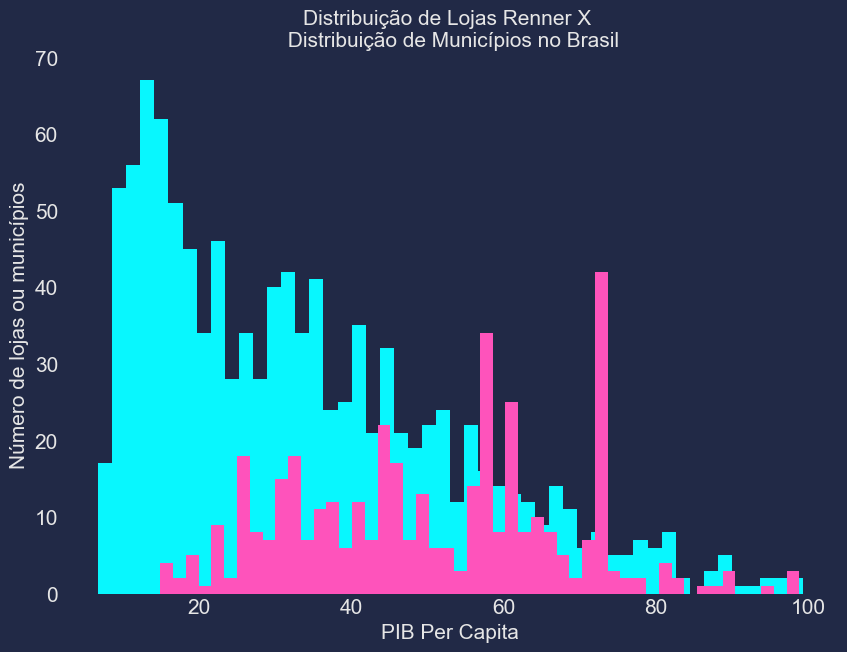

In [19]:
fig, ax = plt.subplots(figsize = (10, 7))

ax.hist(dados_municipios_histograma['pib_per_capta'], bins = 50)
ax.hist(dados_lojas_e_economicos_histograma['pib_per_capta'], bins = 50)
plt.xlabel('PIB Per Capita', fontsize = 15)
plt.ylabel('Número de lojas ou municípios', fontsize = 15)
ax.tick_params(axis='both', labelsize=15)
plt.title("Distribuição de Lojas Renner X \n Distribuição de Municípios no Brasil" , fontsize = 15)
ax.grid(False)
plt.show()

## Passo 4: Concluir padrões observados.

# Dois padrões:

* A maioria das lojas da Renner são em Shoppings.
* Cidades com menores PIB per capita não são alvos da empresa.

# Análise de dados e projeções

--------------

## Passo 5: Traçar um plano de análise.

* Nós sempre queremos ser conservadores em projeções.
* Vamos manter o padrão de shoppings que se encaixam na descrição socio-economica que achamos.

## Passo 6: Pegar os dados faltantes para a projeção.

https://abrasce.com.br/guia-de-shoppings/

In [20]:
dados_shoppings = pd.read_csv('shoppings.csv')
dados_shoppings['City'] = dados_shoppings['City'].str.upper()
dados_shoppings['City'] = dados_shoppings['City'].str.strip()

dados_shoppings

,Shopping,Area por m2,City,State
0,ÁGUAS CLARAS SHOPPING,12626,BRASÍLIA,DF
1,ÁGUAS LINDAS SHOPPING,67788,ÁGUAS LINDAS DE GOIÁS,GO
2,ALAMEDA JUIZ DE FORA,12437,JUIZ DE FORA,MG
3,ALAMEDA SHOPPING,4807,BRASÍLIA,DF
4,ALPHA SQUARE MALL,0,BARUERI,SP
...,...,...,...,...
624,VILLAGIO MALL CENTER,5943,BAURU,SP
625,ASSIS PLAZA SHOPPING,1991,ASSIS,SP
626,MEGA MODA PARK,9920,GOIÂNIA,GO
627,RIVIERA SHOPPING,37393,BERTIOGA,SP


## Passo 7: Fazer a projeção.

* Pegar os dados de quantos shoppings existem em uma determinada cidade.
* Pegar quantas lojas a Renner tem na mesma cidade.
* Caso o número seja menor, contar essa abertura.
* Lojas de rua vão subestimar essa projeção. 
* Vamos lidar com as lojas de rua depois.

<br>

Obs: Você pode tentar cruzar os endereços em uma análise ainda mais criteriosa.

In [21]:
shoppings_por_cidades = dados_shoppings.groupby('City')['City'].size().sort_values()

shoppings_por_cidades

City
ALEXÂNIA           1
MARICÁ             1
MAUÁ               1
MINEIROS           1
MOGI MIRIM         1
                  ..
PORTO ALEGRE      16
GOIÂNIA           19
BRASÍLIA          22
RIO DE JANEIRO    40
SÃO PAULO         56
Name: City, Length: 244, dtype: int64

In [22]:
dados_lojas_em_shoppings = dados_lojas_e_economicos[dados_lojas_e_economicos['Shopping Mall / Street'] == 'Shopping Mall']

dados_lojas_em_shoppings['City'] = dados_lojas_em_shoppings['City'].str.upper()

dados_lojas_em_shoppings

C:\Users\Quins\AppData\Local\Temp\ipykernel_12660\2799995711.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_lojas_em_shoppings['City'] = dados_lojas_em_shoppings['City'].str.upper()


,City,pib,pop,pib_per_capta,UF,Business,Opening date,Country,State,Shopping Mall / Street
0,CACOAL,2792383,86887,32.138099,RO,Renner,2021-04-05,Brazil,Rondônia,Shopping Mall
1,PORTO VELHO,20059522,460434,43.566552,RO,Renner,2008-10-30,Brazil,Rondônia,Shopping Mall
2,RIO BRANCO,10955675,364756,30.035627,AC,Renner,2011-11-08,Brazil,Acre,Shopping Mall
4,MANAUS,103281436,2063689,50.046996,AM,Renner,2014-11-28,Brazil,Amazonas,Shopping Mall
5,MANAUS,103281436,2063689,50.046996,AM,Renner,2014-11-27,Brazil,Amazonas,Shopping Mall
...,...,...,...,...,...,...,...,...,...,...
422,BRASÍLIA,286943782,2817381,101.847703,DF,Renner,2009-06-25,Brazil,Distrito Federal,Shopping Mall
423,BRASÍLIA,286943782,2817381,101.847703,DF,Renner,2007-10-23,Brazil,Distrito Federal,Shopping Mall
424,BRASÍLIA,286943782,2817381,101.847703,DF,Renner,2001-05-08,Brazil,Distrito Federal,Shopping Mall
425,BRASÍLIA,286943782,2817381,101.847703,DF,Renner,2000-11-16,Brazil,Distrito Federal,Shopping Mall


In [23]:
lojas_em_shoppings_por_cidade = dados_lojas_em_shoppings.groupby('City')['City'].size().sort_values()

lojas_em_shoppings_por_cidade

City
ANANINDEUA         1
NOVA FRIBURGO      1
NOVO HAMBURGO      1
OLINDA             1
OURINHOS           1
                  ..
BELO HORIZONTE    10
PORTO ALEGRE      10
BRASÍLIA          10
RIO DE JANEIRO    21
SÃO PAULO         34
Name: City, Length: 189, dtype: int64

In [24]:
shoppings_por_cidades = shoppings_por_cidades.to_frame()
lojas_em_shoppings_por_cidade = lojas_em_shoppings_por_cidade.to_frame()

shoppings_por_cidades.columns = ['Nº de shoppings']
lojas_em_shoppings_por_cidade.columns = ['Nº de lojas']

In [25]:
lojas_em_shoppings_por_cidade

,Nº de lojas
City,
ANANINDEUA,1
NOVA FRIBURGO,1
NOVO HAMBURGO,1
OLINDA,1
OURINHOS,1
...,...
BELO HORIZONTE,10
PORTO ALEGRE,10
BRASÍLIA,10


In [26]:
df_lojas_x_shoppings = lojas_em_shoppings_por_cidade.join(shoppings_por_cidades, how = 'outer')

df_lojas_x_shoppings

,Nº de lojas,Nº de shoppings
City,,
ALEXÂNIA,NaN,1.0
ALTAMIRA,NaN,1.0
ANANINDEUA,1.0,1.0
ANDRADINA,NaN,1.0
ANGRA DOS REIS,1.0,1.0
...,...,...
VITÓRIA DA CONQUISTA,2.0,2.0
VOLTA REDONDA,2.0,2.0
VÁRZEA GRANDE,1.0,1.0


In [27]:
df_lojas_x_shoppings = df_lojas_x_shoppings.fillna(0)

In [28]:
df_lojas_x_shoppings['Novas Aberturas'] = df_lojas_x_shoppings['Nº de shoppings'] - df_lojas_x_shoppings['Nº de lojas']

df_lojas_x_shoppings

,Nº de lojas,Nº de shoppings,Novas Aberturas
City,,,
ALEXÂNIA,0.0,1.0,1.0
ALTAMIRA,0.0,1.0,1.0
ANANINDEUA,1.0,1.0,0.0
ANDRADINA,0.0,1.0,1.0
ANGRA DOS REIS,1.0,1.0,0.0
...,...,...,...
VITÓRIA DA CONQUISTA,2.0,2.0,0.0
VOLTA REDONDA,2.0,2.0,0.0
VÁRZEA GRANDE,1.0,1.0,0.0


In [29]:
df_lojas_x_shoppings.sort_values("Novas Aberturas")

,Nº de lojas,Nº de shoppings,Novas Aberturas
City,,,
TANGARÁ DA SERRA,1.0,0.0,-1.0
CACOAL,1.0,0.0,-1.0
SORRISO,1.0,0.0,-1.0
PARANAVAÍ,1.0,0.0,-1.0
TORRES,1.0,0.0,-1.0
...,...,...,...
CURITIBA,7.0,15.0,8.0
BRASÍLIA,10.0,22.0,12.0
GOIÂNIA,6.0,19.0,13.0


* Tem cidade que vai ficar negativa essa conta e precisamos tirar isso da amostra.

In [30]:
df_lojas_x_shoppings = df_lojas_x_shoppings[df_lojas_x_shoppings['Novas Aberturas'] != -1]

df_lojas_x_shoppings

,Nº de lojas,Nº de shoppings,Novas Aberturas
City,,,
ALEXÂNIA,0.0,1.0,1.0
ALTAMIRA,0.0,1.0,1.0
ANANINDEUA,1.0,1.0,0.0
ANDRADINA,0.0,1.0,1.0
ANGRA DOS REIS,1.0,1.0,0.0
...,...,...,...
VITÓRIA DA CONQUISTA,2.0,2.0,0.0
VOLTA REDONDA,2.0,2.0,0.0
VÁRZEA GRANDE,1.0,1.0,0.0


In [31]:
df_lojas_x_shoppings['Novas Aberturas'].sum()

264.0

# Mas e as lojas de rua?

* A grande restrição são as lojas em shopping. Vamos pegar as lojas totais finais e manter a proporção em relação ao que existe hoje.

In [32]:
lojas_totais = dados_lojas_e_economicos.groupby('Shopping Mall / Street')['Shopping Mall / Street'].size()

lojas_totais

Shopping Mall / Street
Shopping Mall    374
Street            53
Name: Shopping Mall / Street, dtype: int64

In [33]:
lojas_totais['Shopping Mall'] = lojas_totais['Shopping Mall']  + df_lojas_x_shoppings['Novas Aberturas'].sum()

In [34]:
lojas_totais

Shopping Mall / Street
Shopping Mall    638
Street            53
Name: Shopping Mall / Street, dtype: int64

In [35]:
lojas_rua_lojas_shop = 638/0.875878
lojas_rua_lojas_shop

728.411947782682

In [36]:
aberturas_rua = lojas_rua_lojas_shop - lojas_totais['Shopping Mall'] - lojas_totais['Street']
aberturas_rua

37.41194778268198

# Aberturas da Renner

* 264 Lojas em shoppings
* 37 lojas na rua
* 301 lojas no total!
* Não estamos considerando novos shoppings.
* Um aspecto importante é ver um teto claro pra Renner nesse perfil de shoppings que existe hoje.
* A renner abre aprox 25 lojas por ano.

## Acabou? Claro que não!